# Problem Statement

We have a dataset consisting of information regarding red wine products which consist ratings given 
from 0 as lowest to 10 as the highest for the quality of the red wine product involved in observations. 
The dataset informs about the different combination of compositions of number of attributes used in formulation of that red wine sample which acquired the respective rating. 
The task or the problem in hand is to figure out for any given combinations of compositions of these attributes,
what would be the rating of any given wine sample in the range of 0 as lowest to 10 as the highest for the quality of that red wine sample. With the help of this model the business can formulate a required quality of wine for targeted customer and price
range.

# Approach for Solution-

In the available dataset, the target column is 'quality' of the given observations which ranges between 0 to 10 
which is fairly low to consider for the application of a multi-class Classification as an approach.
But, the problem can be made to understand in a better way by means of target variable transformation into a Binary Classification problem which can be created due to the low range of ordinal categorical nature of the 'quality' target feature.
We will hence create the Binary Classification model for the given dataset for the target feature 'quality' where the range of 
the 'quality' from 0 to 10 will be transformed into Binary outcome as rating<=5 - good(quality) & rating>5 - best(quality).
The predictive model will give results for the 'quality' of any given sample and in turn, figuring out which attributes should be used to formulate red wine samples of required rating.

# Essential Libraries-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading of Dataset\Data Collection -

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Initial Data Study

In [3]:
wine.shape

(1599, 12)

In [4]:
wine.info()

#Here we observed that datatypes of dataframe are appropriate, we might not require datatype conversion process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Checking for possible Categorical, Discrete or Continuous data distinguition
#Genereally, unique values>20 makes it a Continuous variable
#Hence we can observe that all the columns are Continuous in nature & the target column is the only Discrete column in data.
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
#Checking for the frequency of the wine quality ratings-
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Exploratory Data Analysis-

## Countplot

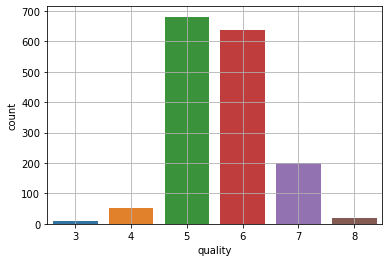

In [9]:
#Countplot for wine quality rating since its the only Discrete column-

sns.countplot(data=wine, x='quality')
plt.grid()

## Barplot

In [10]:
#Checking the relation and effect of the independant features with the target varable-

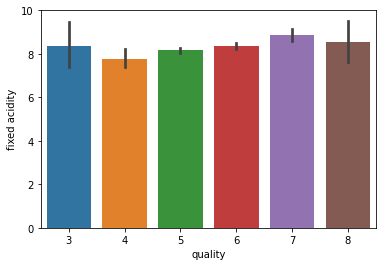

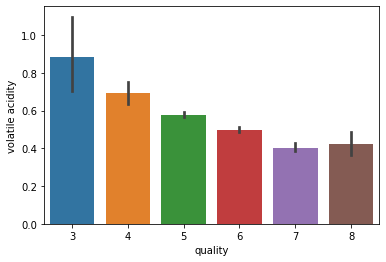

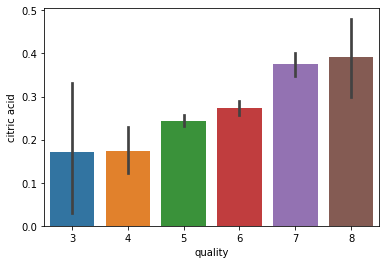

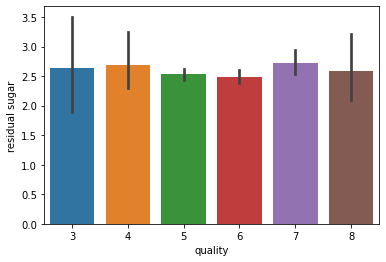

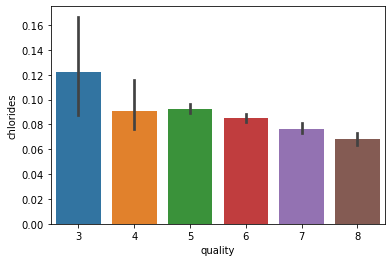

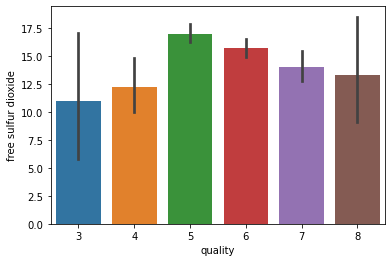

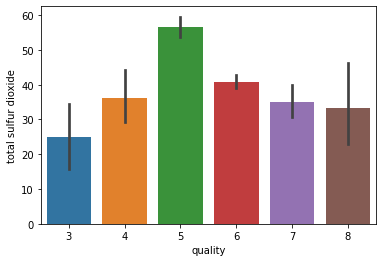

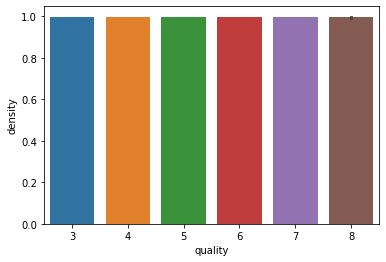

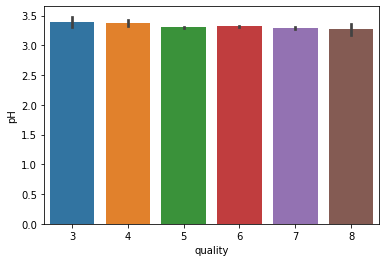

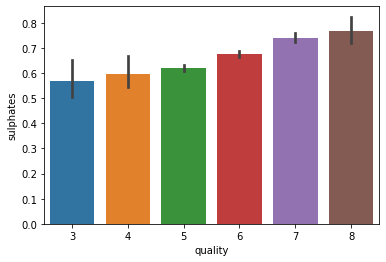

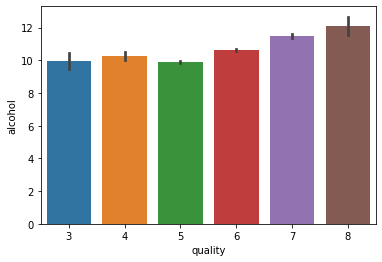

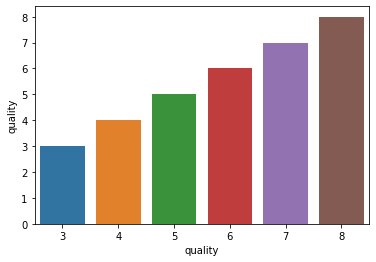

In [11]:
for i in wine.columns:
    sns.barplot(data=wine,x='quality', y=i)
    plt.show() 

Barplot Interpretation-
From the Barplot results, we can study the effect of each feature on the target column 'quality'.
It is evident from the charts that some features show increasing trend, some descreasing and few have no clear pattern.
The features which are not showing any recognizable impact on target can be eliminated with further study while the useful ones can be selected for modelling.

### Barplot Result-
Impactful Columns observed-
- volatile acidity
- citric acid
- sulphates
- alcohol



## Boxplot

In [12]:
#The relation or distribution between Discrete vs Continuous variable is better understood with the help of Boxplots 
#Hence plotting Boxplots against the target(Categorical) feature

Boxplot for fixed acidity by quality


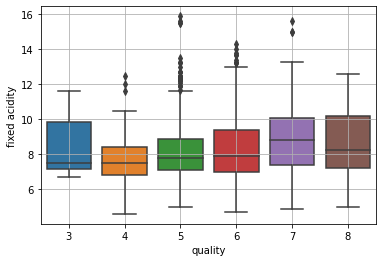

Boxplot for volatile acidity by quality


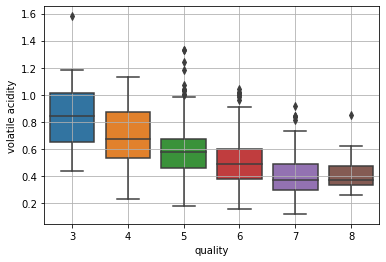

Boxplot for citric acid by quality


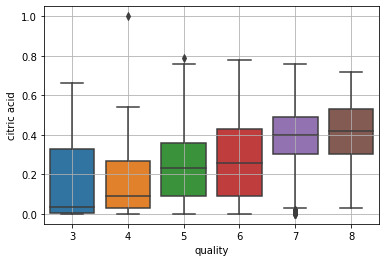

Boxplot for residual sugar by quality


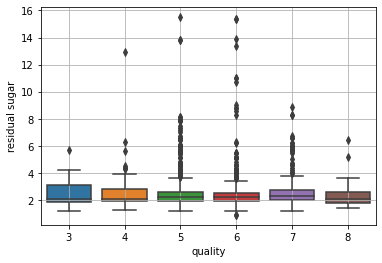

Boxplot for chlorides by quality


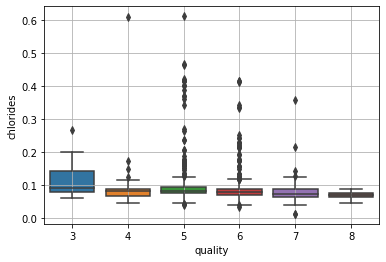

Boxplot for free sulfur dioxide by quality


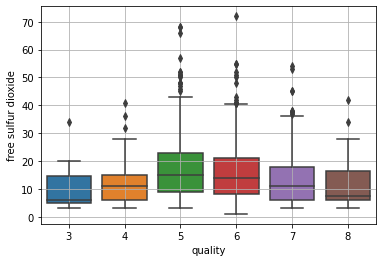

Boxplot for total sulfur dioxide by quality


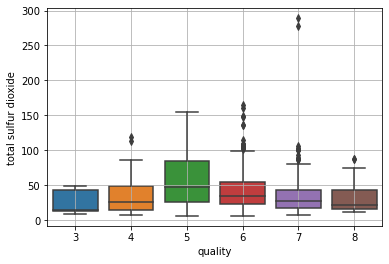

Boxplot for density by quality


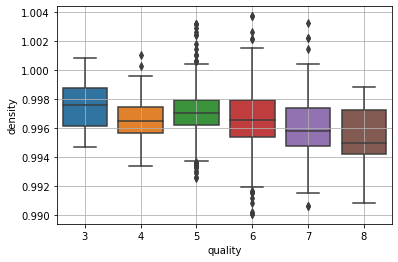

Boxplot for pH by quality


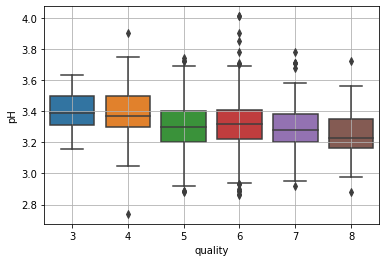

Boxplot for sulphates by quality


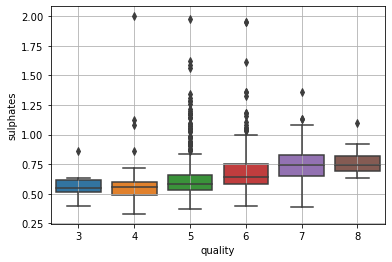

Boxplot for alcohol by quality


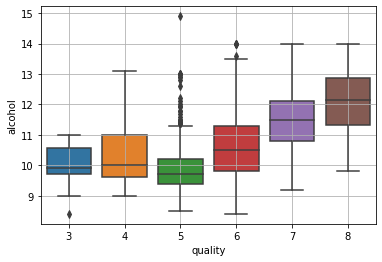

Boxplot for quality by quality


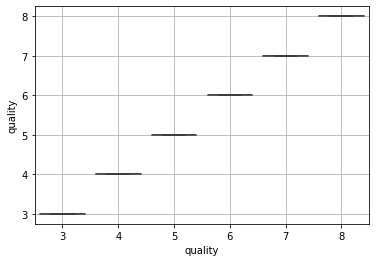

In [13]:
for i in wine.columns:
    sns.boxplot(data=wine, x='quality', y =i)
    plt.grid()
    plt.title(print(f'Boxplot for {i} by quality'))
    plt.show()

Boxplot Interpretation-
After plotting the Boxplots, we can observe the effect of the independant features on the dependant, target variable which shows the trend and distribution of the relational values and helps strenthen the results of the bar charts. It is showing us somewhat same result as Barplot. 

## Histogram

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

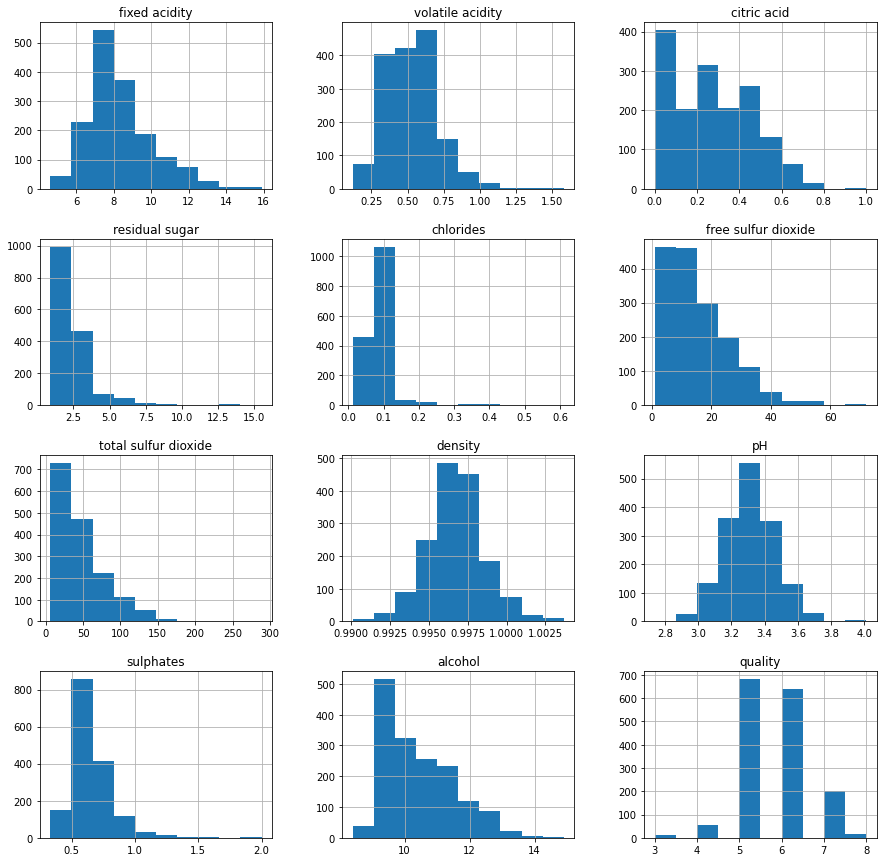

In [14]:
#Since all the Independant variables are Continuous, we will study their distribution characterstics with Histograms and transformations can be done later on to improve it
wine.hist(wine.columns, figsize=(15,15))

Histogram observation-
Here we can see that the outliers are not that many

In [15]:
#Pairplot
#sns.pairplot(wine)

# Conversion of Target column values to Binary for Binary Classification approach (Feature Extraction)

To convert the 
The Wine Quality rating will be divided into two categories-
1. quality<=5 - good - 0
2. quality>5 - best - 1

In [16]:
wine['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
wine['quality'] = wine['quality'].apply(lambda x:1 if x>5 else 0 )
wine['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [18]:
wine['quality'].value_counts() 

1    855
0    744
Name: quality, dtype: int64

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


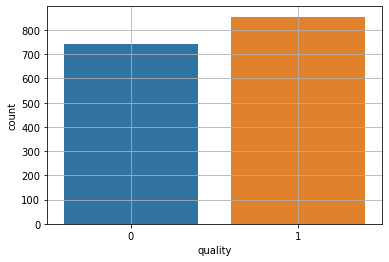

In [20]:
#Countplot for transformed target feature
sns.countplot(data=wine, x='quality')
plt.grid()

#Here we can observe that the data is not imbalanced hence we can proceed further

# Data Preprocessing

In [21]:
wine.isnull().sum()

#Since there are no NaN values, the data is clean

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
#Checking & Removing duplicate entries

wine[wine.duplicated()].shape

(240, 12)

In [23]:
#Before removing duplicates
print("Before removing duplicates: ", wine.shape)

#after removing duplicates
print("After removing duplicates: ", wine.drop_duplicates(inplace=True), wine.shape)

Before removing duplicates:  (1599, 12)
After removing duplicates:  None (1359, 12)


# Holdout Validation -

In [24]:
#Seperating the Independant and Dependant features
x = wine.drop('quality', axis=1)
y = wine['quality']

In [25]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [26]:
x.shape 

(1359, 11)

In [27]:
y.head()

0    0
1    0
2    0
3    1
5    0
Name: quality, dtype: int64

In [28]:
y.shape 

(1359,)

In [29]:
#Train-Test-Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

In [30]:
#Split observation
print(y.shape,y_train.shape,y_test.shape)

(1359,) (1087,) (272,)


# Feature Selection

## EDA Results-
- volatile acidity
- citric acid
- sulphates
- alcohol

## Correlation Matrx-

<AxesSubplot: >

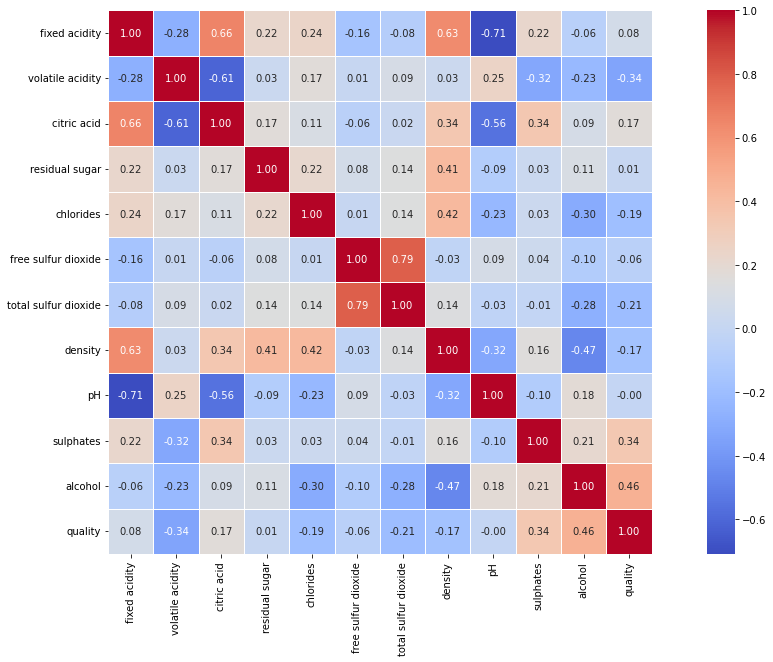

In [31]:

#Plotting the heatmap of correlation, darker blue and darker red tiles indicate good relation
# darker red- positive higher value, darker blue - negative higher value 
 
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(method='spearman'), annot=True, linecolor="white",linewidths=0.65,  fmt=".2f", cmap="coolwarm",square=True)#, annot_kws={"size":10})

In [32]:
winecorr = wine.corr(method='spearman')
winecorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696,-0.062696,0.077758
volatile acidity,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207,-0.225714,-0.335441
citric acid,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512,0.090798,0.168331
residual sugar,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702,0.112205,0.009463
chlorides,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630,-0.301525,-0.191999
free sulfur dioxide,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320,-0.099386,-0.060640
total sulfur dioxide,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333,-0.275353,-0.205190
density,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787,-0.470019,-0.172866
pH,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048,0.183005,-0.001222
sulphates,0.220696,-0.324207,0.341512,0.029702,0.033630,0.041320,-0.008333,0.157787,-0.100048,1.000000,0.207636,0.335327


In [33]:
# Getting features with good corelation with target
winecorr = wine.corr(method='spearman')
winecorr['quality'][abs(winecorr['quality'])>0.3]

volatile acidity   -0.335441
sulphates           0.335327
alcohol             0.460086
quality             1.000000
Name: quality, dtype: float64

In [34]:
# Getting the columns which have multicolinearity
col_corr = []
for i in range (len(winecorr.columns)):
    for j in range (i):
        if abs(winecorr.iloc[i,j]) > 0.5:
            colname1 = winecorr.columns[i]
            colname2 = winecorr.columns[j]
            col_corr.append([colname1,colname2])
col_corr

#We found that the columns which have good correlation with target does not have any multi-colinearity

[['citric acid', 'fixed acidity'],
 ['citric acid', 'volatile acidity'],
 ['total sulfur dioxide', 'free sulfur dioxide'],
 ['density', 'fixed acidity'],
 ['pH', 'fixed acidity'],
 ['pH', 'citric acid']]

Correlation Matrix Result-
- volatile acidity   
- sulphates
- alcohol             

## RFECV-

In [35]:
from sklearn.feature_selection import RFECV

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dtr = DecisionTreeRegressor()

In [38]:
rfe = RFECV(estimator=dtr,min_features_to_select=3)

In [39]:
rfe.fit(x_train,y_train)

RFECV(estimator=DecisionTreeRegressor(), min_features_to_select=3)

In [40]:
rfe.get_feature_names_out()

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype=object)

RFECV Result-
- 'fixed acidity' 
- 'volatile acidity'
- 'chlorides'
- 'total sulfur dioxide'
- 'sulphates'
- 'alcohol'

## Selecting Final Predictors by comparing EDA, Correlation Matrix and RFECV results-

EDA Results-
- volatile acidity
- citric acid
- sulphates
- alcohol

Correlation Matrix Result-
- volatile acidity   
- sulphates
- alcohol             

RFECV Result-
- 'fixed acidity' 
- 'volatile acidity'
- 'chlorides'
- 'total sulfur dioxide'
- 'sulphates'
- 'alcohol'

## Final Predictors

In [41]:
Predictors = ['volatile acidity','citric acid','sulphates', 'alcohol']

##  x_train & x_test with finally selected predictors-

In [42]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
785,9.9,0.350,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5
1553,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4
687,9.1,0.640,0.23,3.1,0.095,13.0,38.0,0.99980,3.28,0.59,9.7
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.99630,3.25,0.63,9.2
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0


In [43]:
x_train = x_train[Predictors]

In [44]:
x_test = x_test[Predictors]

# Feature Scaling 

In [45]:
# Using Standard Scaler for feature scaling

from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [48]:
x_train.shape, x_test.shape

((1087, 4), (272, 4))

In [49]:
y_train.shape,y_test.shape

((1087,), (272,))

# Model Building

## Random Forest Classifier

### Raw Model for RFC

In [50]:
#Model Instance
from sklearn.ensemble import RandomForestClassifier
rfc_wine = RandomForestClassifier()

In [51]:
#Raw Model Fitting

rfc_wine.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
#Predicting the Target Variable

y_pred_test = rfc_wine.predict(x_test)
y_pred_train = rfc_wine.predict(x_train)

In [53]:
#Raw Model Evaluation
#Raw Model performance observation

In [54]:
#Training Accuracy-
accuracy_score(y_train,y_pred_train)

0.9990800367985281

In [55]:
#Testing Accuracy-
accuracy_score(y_test,y_pred_test)

0.6838235294117647

In [56]:
#Raw Model Precision Recall-

In [57]:
precision_score(y_test, y_pred_test)

0.7175572519083969

In [58]:
recall_score(y_test,y_pred_test) 

0.6573426573426573

In [59]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       129
           1       0.72      0.66      0.69       143

    accuracy                           0.68       272
   macro avg       0.69      0.69      0.68       272
weighted avg       0.69      0.68      0.68       272



In [60]:
#Use cross validation technique to solve the problem
from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc_wine, x_train, y_train, cv=5)

print(rfc_cv_score)
print("Random Forest Classifier Mean Score: ", rfc_cv_score.mean().round(5)*100,'%')

[0.71100917 0.71100917 0.73732719 0.70046083 0.73732719]
Random Forest Classifier Mean Score:  71.943 %


In [61]:
#Plotting ROC Curve- 

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_test)

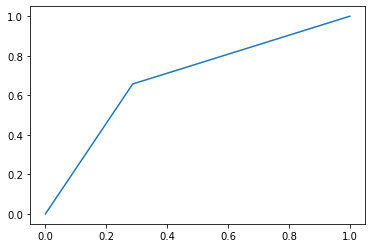

In [62]:
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier')
plt.show()

### Hyperparameter Tuning for RFC

In [63]:
#Parameter selection for RFC

param_grid = {'n_estimators':np.arange(1,50), "criterion":['gini','entropy'], 'max_depth':[3,5,7,11,15,20], 'min_samples_leaf':np.arange(1,10), 'min_samples_split':np.arange(1,10)}

In [64]:
#HPT with Cross Validation

rscv_wine = RandomizedSearchCV(rfc_wine, param_grid, cv=5) 

In [65]:
rscv_wine.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 11, 15, 20],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [66]:
rscv_wine.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=8,
                       n_estimators=16)

We found out with HPT-
- (max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=30)

### Building enhanced model with HPT findings

In [67]:
hpt_wine = RandomForestClassifier(criterion='entropy',max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=37)

In [68]:
hpt_wine.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=37)

In [69]:
y_pred_h = hpt_wine.predict(x_test)

In [70]:
#Testing Accuracy
accuracy_score(y_test,y_pred_h)

0.7132352941176471

In [71]:
rfc_hpt_testing_acc = accuracy_score(y_test,y_pred_h)

In [72]:
y_pred_h_train = hpt_wine.predict(x_train)

In [73]:
#Training Accuracy
accuracy_score(y_train,y_pred_h_train)

0.7718491260349586

In [74]:
rfc_hpt_training_acc = accuracy_score(y_train,y_pred_h_train)

In [75]:
precision_score(y_test,y_pred_h)

0.7372262773722628

In [76]:
rfc_hpt_pre = precision_score(y_test,y_pred_h)

In [77]:
recall_score(y_test,y_pred_h) 

0.7062937062937062

In [78]:
rfc_hpt_rec = recall_score(y_test,y_pred_h) 

In [79]:
print(classification_report(y_test, y_pred_h))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       129
           1       0.74      0.71      0.72       143

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272



<AxesSubplot: >

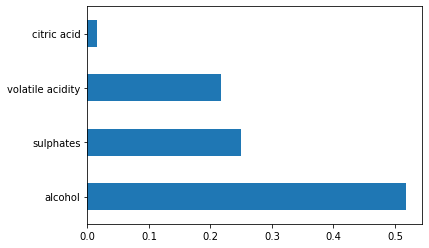

In [80]:
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(hpt_wine.feature_importances_, index=wine[Predictors].columns)
feature_importances.nlargest(10).plot(kind='barh')  

#Hence we can say that the most impactful feature for classification is 'alcohol'

# Classification using Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression 

In [82]:
logr = LogisticRegression()

In [83]:
logr.fit(x_train, y_train)

LogisticRegression()

In [84]:
y_pred_train = logr.predict(x_train)
y_pred_test = logr.predict(x_test)

In [85]:
#Training Accuracy
accuracy_score(y_pred_train, y_train)

0.7460901563937442

In [86]:
logr_training_acc = accuracy_score(y_pred_train, y_train)

In [87]:
#Testing Accuracy
accuracy_score(y_test, y_pred_test)

0.6911764705882353

In [88]:
logr_testing_acc = accuracy_score(y_test, y_pred_test)

In [89]:
print("Logistic Regression Classifier Mean Score: ", cross_val_score(logr, x_train, y_train, cv=5).mean().round(5)*100,'%')

Logistic Regression Classifier Mean Score:  74.795 %


In [90]:
precision_score(y_test,y_pred_test)

0.7251908396946565

In [91]:
logr_prec = precision_score(y_test,y_pred_test)

In [92]:
recall_score(y_test,y_pred_test) 

0.6643356643356644

In [93]:
logr_rec = recall_score(y_test,y_pred_test)

In [94]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       129
           1       0.73      0.66      0.69       143

    accuracy                           0.69       272
   macro avg       0.69      0.69      0.69       272
weighted avg       0.69      0.69      0.69       272



In [95]:
#Plotting ROC Curve- 

fpr_logr, tpr_logr, thresholds_logr = roc_curve(y_test, y_pred_test, pos_label=1)

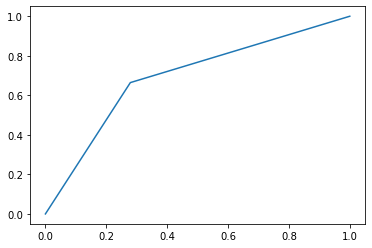

In [96]:
plt.plot(fpr_logr, tpr_logr)
plt.show()

## Algorithms Comparison

In [97]:
#Algorithm Accuracies
modac = pd.DataFrame(columns=['Training Accuracy', 'Testing Accuracy'], index=['RFC', 'LogR'], data=[[round(rfc_hpt_training_acc,3), round(rfc_hpt_testing_acc,3)],[round(logr_training_acc,3),round(logr_testing_acc,3)]])
modac

,Training Accuracy,Testing Accuracy
RFC,0.772,0.713
LogR,0.746,0.691


In [98]:
#Algorithm Precision Recall
modac = pd.DataFrame(columns=['Testing Precision', 'Testing Recall'], index=['RFC', 'LogR'], data=[[round(rfc_hpt_pre,3),round(rfc_hpt_rec,3)],[round(logr_prec,3),round(logr_rec,3)]])
modac

,Testing Precision,Testing Recall
RFC,0.737,0.706
LogR,0.725,0.664


# Conclusion

From the results of the models we can observe that the models are performing at around similar level, the Random Forest model has a better chance to learn from the data with similar testing data accuracy along with better precision and recall score hence, we will conclude that the Random Forest Classifier with Hyperparameter tuning is giving us a better result for the problem.

# Testpoint Creation

In [99]:
Predictors

['volatile acidity', 'citric acid', 'sulphates', 'alcohol']

In [100]:
testpoint = [[0.52,0.27,0.65,10.4]]

In [101]:
if hpt_wine.predict(testpoint)[0]==0:
    print("For testpoint: ", testpoint)
    print("Prediction:0- Good Quality Wine(Rating-3,4 or 5)")
else:
    print("For testpoint: ", testpoint)
    print("Prediction:= **1**- Best Quality Wine(Rating-6,7 or 8)")

For testpoint:  [[0.52, 0.27, 0.65, 10.4]]
Prediction:= **1**- Best Quality Wine(Rating-6,7 or 8)
